CLASIFICACION MULTICLASE

CON REGULARIZACION

Primero conectamos nuestro drive con el cuadernillo

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Ahora importamos librerias para que funciones el codigo

In [55]:
# utilizado para la manipulación de directorios y rutas
import os

# Cálculo científico y vectorial para python
import numpy as np

# Libreria para graficos
from matplotlib import pyplot

# Modulo de optimizacion en scipy
from scipy import optimize

# modulo para cargar archivos en formato MATLAB
# from scipy.io import loadmat

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

Se inicia el ejercicio cargando primero el conjunto de datos donde se selecciona 80% de los ejemplos para el entrenamiento

In [56]:
# La entrada es de 14 elemento contando con x0
input_layer_size  = 14

# 10 etiquetas, de 1 a 10 (tomar en cuenta que se asigna "0" a la etiqueta 10)
num_labels = 7

#  datos de entrenamiento almacenados en los arreglos X, y
# data = loadmat(os.path.join('Datasets', 'ex3data1.mat'))
data = np.loadtxt('/content/drive/MyDrive/Dataset/WineModificado4.csv', delimiter=',')

# print(data['y'])
# print(data['y'].ravel())
# print(data['X'])
X = data[:25986, 1:13]
y = data[:25986, 13]
# X, y = data['X'], data['y'].ravel()
# print(X)
# print(y)
# establecer el dígito cero en 0, en lugar del 10 asignado a este conjunto de datos
# Esto se hace debido a que el conjunto de datos se utilizó en MATLAB donde no hay índice 0
y[y == 3] = 0
y[y == 4] = 1
y[y == 5] = 2
y[y == 6] = 3
y[y == 7] = 4
y[y == 8] = 5
y[y == 9] = 6
# print(y)

m = y.size
print(X)
print(y)

[[ 7.4    0.17   0.29  ...  0.65  10.4    1.   ]
 [ 5.3    0.31   0.38  ...  0.46  11.7    1.   ]
 [ 4.7    0.145  0.29  ...  0.49  11.3    1.   ]
 ...
 [ 6.4    0.27   0.49  ...  0.43   9.2    1.   ]
 [ 8.3    0.16   0.37  ...  0.37  11.9    1.   ]
 [ 9.2    0.31   0.36  ...  0.86  12.     0.   ]]
[3. 3. 3. ... 3. 3. 4.]


SE CAMBIO LOS VALORES DE LAS CLASES COMO SE INDICO EN LA CLASE DE LABORATORIO PARA ADECUARLOS A LOS VALORES QUE DEVUELVE ARMAC (3 = 0 PESIMO) (4 = 1 MUY MALO) (5 = 2 MALO) (6 = 3 REGULAR) (7 = 4 BUENO) (8 = 5 MUY BUENO) (9 = 6 EXCELENTE)

NORMALIZAR

In [57]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [58]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

In [59]:
# Configurar la matriz adecuadamente, y agregar una columna de unos que corresponde al termino de intercepción.
m, n = X.shape
# Agraga el termino de intercepción a A
# X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)
X = X_norm
# X = np.concatenate([np.ones((m, 1)), X], axis=1)

FUNCION SIGMOIDE

In [51]:
def sigmoid(z):
    """
    Calcula la sigmoide de z.
    """
    return 1.0 / (1.0 + np.exp(-z))

VECTORIZACION DEL GRADIENTE

In [60]:
def lrCostFunction(theta, X, y, lambda_):
    """
    Calcula el costo de usar theta como parámetro para la regresión logística regularizada y
    el gradiente del costo w.r.t. a los parámetros.

    Parametros
    ----------
    theta : array_like
        Parametro theta de la regresion logistica. Vector de la forma(shape) (n, ). n es el numero de caracteristicas
        incluida la intercepcion

    X : array_like
        Dataset con la forma(shape) (m x n). m es el numero de ejemplos, y n es el numero de
        caracteristicas (incluida la intercepcion).

    y : array_like
        El conjunto de etiquetas. Un vector con la forma (shape) (m, ). m es el numero de ejemplos

    lambda_ : float
        Parametro de regularización.

    Devuelve
    -------
    J : float
        El valor calculado para la funcion de costo regularizada.

    grad : array_like
        Un vector de la forma (shape) (n, ) que es el gradiente de la
        función de costo con respecto a theta, en los valores actuales de theta..
    """
#     alpha = 0.003
#     theta = theta.copy()
    # Inicializa algunos valores utiles
    m = y.size

    # convierte las etiquetas a valores enteros si son boleanos
    if y.dtype == bool:
        y = y.astype(int)

    J = 0
    grad = np.zeros(theta.shape)

    h = sigmoid(X.dot(theta.T))

    temp = theta
    temp[0] = 0

#     J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + (lambda_ / (2 * m)) * np.sum(np.square(temp))

    grad = (1 / m) * (h - y).dot(X)
#     theta = theta - (alpha / m) * (h - y).dot(X)
    grad = grad + (lambda_ / m) * temp

    return J, grad
#    return J, theta

GRAFICO DE FUNCION COSTO

theta calculado por el descenso por el gradiente: 0.6931471805599537


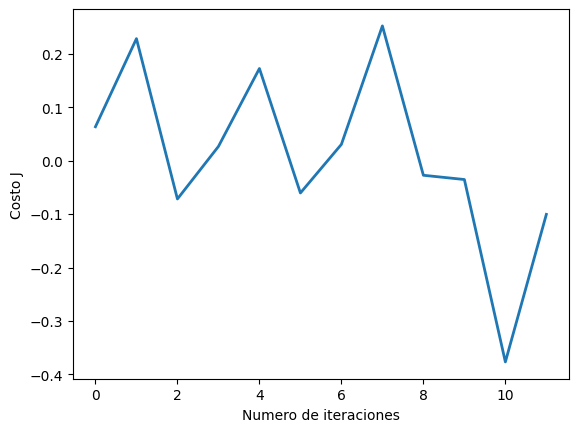

In [61]:
# Elegir algun valor para alpha (probar varias alternativas)
lambda_ = 0.1
num_iters = 33000

# inicializa theta y ejecuta el descenso por el gradiente
theta= np.zeros(12)
theta, J_history = lrCostFunction(theta, X, y, lambda_)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

CLASIFICACION ONE VS ALL

In [20]:
def oneVsAll(X, y, num_labels, lambda_):
    """
    Trains num_labels logistic regression classifiers and returns
    each of these classifiers in a matrix all_theta, where the i-th
    row of all_theta corresponds to the classifier for label i.

    Parameters
    ----------
    X : array_like
        The input dataset of shape (m x n). m is the number of
        data points, and n is the number of features. Note that we
        do not assume that the intercept term (or bias) is in X, however
        we provide the code below to add the bias term to X.

    y : array_like
        The data labels. A vector of shape (m, ).

    num_labels : int
        Number of possible labels.

    lambda_ : float
        The logistic regularization parameter.

    Returns
    -------
    all_theta : array_like
        The trained parameters for logistic regression for each class.
        This is a matrix of shape (K x n+1) where K is number of classes
        (ie. `numlabels`) and n is number of features without the bias.
    """
    # algunas variables utiles
    m, n = X.shape

    all_theta = np.zeros((num_labels, n + 1))

    # Agrega unos a la matriz X
    X = np.concatenate([np.ones((m, 1)), X], axis=1)

    for c in np.arange(num_labels):
        initial_theta = np.zeros(n + 1)
        options = {'maxiter': 50}
        res = optimize.minimize(lrCostFunction,
                                initial_theta,
                                (X, (y == c), lambda_),
                                jac=True,
                                method='CG',
                                options=options)

        all_theta[c] = res.x

    return all_theta

In [21]:
lambda_ = 0.1
all_theta = oneVsAll(X, y, num_labels, lambda_)
print(all_theta.shape)

(7, 13)


In [22]:
print(all_theta)

[[-6.25368351e+00  1.30087181e+00  9.75194062e-01 -1.02264784e-01
   3.55759377e-01  4.15013205e-01  6.91433439e-01 -5.63565143e-01
  -6.51260261e-01  8.34746000e-01 -2.89803651e-01 -4.83043387e-01
   1.42953902e+00]
 [-3.96195981e+00 -3.18624780e-02  8.38770828e-01 -9.05110534e-02
  -7.71796646e-01 -1.77474986e-02 -7.58018714e-01 -1.88137196e-01
   6.68454296e-01 -1.39858516e-04 -8.31797150e-02 -2.76011992e-01
   1.64660212e+00]
 [-9.32945173e-01 -1.93002938e-01  4.91460730e-01  9.14202740e-02
  -4.49974676e-01  3.40099384e-02 -2.16494426e-01  4.26210513e-01
   2.95511292e-01 -1.66651104e-01 -2.55597686e-01 -8.93219283e-01
  -1.28590463e-01]
 [-2.62603138e-01 -1.79487487e-01 -4.79779943e-01 -8.74173164e-02
  -1.39934050e-01 -5.03713078e-04  1.01383396e-01 -1.67112555e-01
   4.68709406e-01 -8.53970083e-02 -7.87496917e-04  3.56346976e-01
  -3.48238187e-02]
 [-2.08070501e+00  6.50140867e-01 -6.03482097e-01 -6.65094786e-02
   9.20027197e-01 -2.92752350e-01  1.51246200e-01 -2.21946084e-01


PREDICCION ONE VS ALL

In [23]:
def predictOneVsAll(all_theta, X):
    """
    Devuelve un vector de predicciones para cada ejemplo en la matriz X.
    Tenga en cuenta que X contiene los ejemplos en filas.
    all_theta es una matriz donde la i-ésima fila es un vector theta de regresión logística entrenada para la i-ésima clase.
    Debe establecer p en un vector de valores de 0..K-1 (por ejemplo, p = [0, 2, 0, 1]
    predice clases 0, 2, 0, 1 para 4 ejemplos).

    Parametros
    ----------
    all_theta : array_like
        The trained parameters for logistic regression for each class.
        This is a matrix of shape (K x n+1) where K is number of classes
        and n is number of features without the bias.

    X : array_like
        Data points to predict their labels. This is a matrix of shape
        (m x n) where m is number of data points to predict, and n is number
        of features without the bias term. Note we add the bias term for X in
        this function.

    Devuelve
    -------
    p : array_like
        The predictions for each data point in X. This is a vector of shape (m, ).
    """

    m = X.shape[0];
    num_labels = all_theta.shape[0]

    p = np.zeros(m)

    # Add ones to the X data matrix
    X = np.concatenate([np.ones((m, 1)), X], axis=1)
    p = np.argmax(sigmoid(X.dot(all_theta.T)), axis = 1)

    return p

SE SELECCIONA 20% DEL DATASET PARA HACER LAS PRUEBAS DE PREDICCION

In [24]:
print(X.shape)
pred = predictOneVsAll(all_theta, X)
print('Precision del conjuto de entrenamiento: {:.2f}%'.format(np.mean(pred == y) * 100))
XPrueba = data[25986:, 1:13].copy()
print(XPrueba.shape)
#print(np.ones((1)))
#print(XPrueba)
#p = np.zeros(1)
XPrueba = np.concatenate([np.ones((6499, 1)), XPrueba], axis=1)
print(XPrueba.shape)
p = np.argmax(sigmoid(XPrueba.dot(all_theta.T)), axis = 1)
print(p)

# displayData(X[1002:1003, :])
print(y[-50:])
print(p[-50:])

(25986, 12)
Precision del conjuto de entrenamiento: 54.40%
(6499, 12)
(6499, 13)
[2 2 6 ... 2 6 2]
[2. 4. 4. 3. 2. 3. 4. 3. 3. 5. 4. 4. 2. 3. 3. 2. 2. 3. 3. 3. 2. 4. 2. 4.
 3. 2. 2. 4. 3. 3. 3. 2. 2. 3. 3. 3. 4. 2. 4. 3. 5. 4. 4. 3. 2. 2. 3. 3.
 3. 4.]
[2 6 2 2 2 2 6 6 6 2 6 6 6 2 2 2 2 6 2 2 6 6 2 2 2 2 6 2 6 6 2 2 6 6 6 2 2
 2 2 6 2 6 2 2 6 2 2 2 6 2]


CLASIFICACION MULTICLASE

SIN REGULARIZACION

In [25]:
# utilizado para la manipulación de directorios y rutas
import os

# Cálculo científico y vectorial para python
import numpy as np

# Libreria para graficos
from matplotlib import pyplot

# Modulo de optimizacion en scipy
from scipy import optimize

# modulo para cargar archivos en formato MATLAB
# from scipy.io import loadmat

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

Se inicia el ejercicio cargando primero el conjunto de datos donde se selecciona 80% de los ejemplos para el entrenamiento

In [26]:
# La entrada es de 14 elemento contando con x0
input_layer_size  = 14

# 10 etiquetas, de 1 a 10 (tomar en cuenta que se asigna "0" a la etiqueta 10)
num_labels = 7

#  datos de entrenamiento almacenados en los arreglos X, y
# data = loadmat(os.path.join('Datasets', 'ex3data1.mat'))
data = np.loadtxt('/content/drive/MyDrive/Dataset/WineModificado4.csv', delimiter=',')

# print(data['y'])
# print(data['y'].ravel())
# print(data['X'])
X = data[:25986, 1:13]
y = data[:25986, 13]
# X, y = data['X'], data['y'].ravel()
# print(X)
# print(y)
# establecer el dígito cero en 0, en lugar del 10 asignado a este conjunto de datos
# Esto se hace debido a que el conjunto de datos se utilizó en MATLAB donde no hay índice 0
y[y == 3] = 0
y[y == 4] = 1
y[y == 5] = 2
y[y == 6] = 3
y[y == 7] = 4
y[y == 8] = 5
y[y == 9] = 6
# print(y)

m = y.size
print(X)
print(y)

[[ 7.4    0.17   0.29  ...  0.65  10.4    1.   ]
 [ 5.3    0.31   0.38  ...  0.46  11.7    1.   ]
 [ 4.7    0.145  0.29  ...  0.49  11.3    1.   ]
 ...
 [ 6.4    0.27   0.49  ...  0.43   9.2    1.   ]
 [ 8.3    0.16   0.37  ...  0.37  11.9    1.   ]
 [ 9.2    0.31   0.36  ...  0.86  12.     0.   ]]
[3. 3. 3. ... 3. 3. 4.]


SE CAMBIO LOS VALORES DE LAS CLASES COMO SE INDICO EN LA CLASE DE LABORATORIO PARA ADECUARLOS A LOS VALORES QUE DEVUELVE ARMAC (3 = 0 PESIMO) (4 = 1 MUY MALO) (5 = 2 MALO) (6 = 3 REGULAR) (7 = 4 BUENO) (8 = 5 MUY BUENO) (9 = 6 EXCELENTE)

NORMALIZAR

In [27]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [28]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

In [29]:
# Configurar la matriz adecuadamente, y agregar una columna de unos que corresponde al termino de intercepción.
m, n = X.shape
# Agraga el termino de intercepción a A
# X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)
X = X_norm
# X = np.concatenate([np.ones((m, 1)), X], axis=1)

FUNCION SIGMOIDE

In [30]:
def sigmoid(z):
    """
    Calcula la sigmoide de z.
    """
    return 1.0 / (1.0 + np.exp(-z))

VECTORIZACION DEL GRADIENTE

In [31]:
def lrCostFunction(theta, X, y, lambda_):

#     alpha = 0.003
#     theta = theta.copy()
    # Inicializa algunos valores utiles
    m = y.size

    # convierte las etiquetas a valores enteros si son boleanos
    if y.dtype == bool:
        y = y.astype(int)

    J = 0
    grad = np.zeros(theta.shape)

    h = sigmoid(X.dot(theta.T))

    temp = theta
    temp[0] = 0

    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
    # J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + (lambda_ / (2 * m)) * np.sum(np.square(temp))

    grad = (1 / m) * (h - y).dot(X)
#     theta = theta - (alpha / m) * (h - y).dot(X)
    # grad = grad + (lambda_ / m) * temp

    return J, grad
#    return J, theta

GRAFICO DE FUNCION COSTO

theta calculado por el descenso por el gradiente: 0.6931471805599537


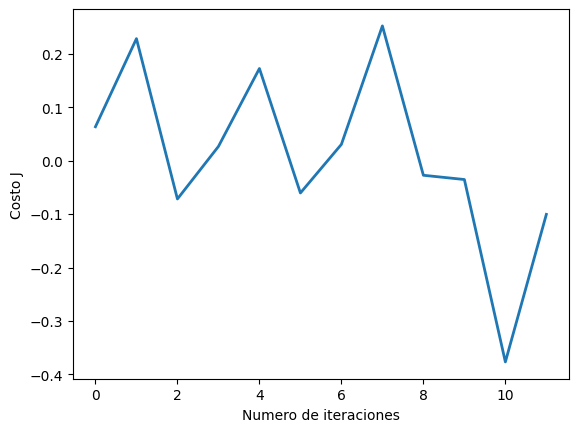

In [32]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001
num_iters = 33000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(12)
theta, J_history = lrCostFunction(theta, X, y, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

CLASIFICACION ONE VS ALL

In [33]:
def oneVsAll(X, y, num_labels, lambda_):
    """
    Trains num_labels logistic regression classifiers and returns
    each of these classifiers in a matrix all_theta, where the i-th
    row of all_theta corresponds to the classifier for label i.

    Parameters
    ----------
    X : array_like
        The input dataset of shape (m x n). m is the number of
        data points, and n is the number of features. Note that we
        do not assume that the intercept term (or bias) is in X, however
        we provide the code below to add the bias term to X.

    y : array_like
        The data labels. A vector of shape (m, ).

    num_labels : int
        Number of possible labels.

    lambda_ : float
        The logistic regularization parameter.

    Returns
    -------
    all_theta : array_like
        The trained parameters for logistic regression for each class.
        This is a matrix of shape (K x n+1) where K is number of classes
        (ie. `numlabels`) and n is number of features without the bias.
    """
    # algunas variables utiles
    m, n = X.shape

    all_theta = np.zeros((num_labels, n + 1))

    # Agrega unos a la matriz X
    X = np.concatenate([np.ones((m, 1)), X], axis=1)

    for c in np.arange(num_labels):
        initial_theta = np.zeros(n + 1)
        options = {'maxiter': 50}
        res = optimize.minimize(lrCostFunction,
                                initial_theta,
                                (X, (y == c), lambda_),
                                jac=True,
                                method='CG',
                                options=options)

        all_theta[c] = res.x

    return all_theta

In [34]:
lambda_ = 0.1
all_theta = oneVsAll(X, y, num_labels, lambda_)
print(all_theta.shape)

(7, 13)


In [35]:
print(all_theta)

[[-6.25379401e+00  1.31125070e+00  9.74728331e-01 -1.01066909e-01
   3.73652936e-01  4.14927954e-01  6.92515187e-01 -5.61926841e-01
  -6.83118127e-01  8.40036508e-01 -2.89546715e-01 -4.98814485e-01
   1.41508003e+00]
 [-3.96235326e+00 -3.32231166e-02  8.38742944e-01 -9.00755809e-02
  -7.73137723e-01 -1.84745517e-02 -7.58345395e-01 -1.88599815e-01
   6.70166486e-01 -8.14505884e-04 -8.27028387e-02 -2.75346219e-01
   1.64668366e+00]
 [-9.32921595e-01 -1.93050416e-01  4.91458994e-01  9.14320456e-02
  -4.50041197e-01  3.40048583e-02 -2.16541641e-01  4.26278351e-01
   2.95536308e-01 -1.66677544e-01 -2.55623521e-01 -8.93255967e-01
  -1.28653737e-01]
 [-2.62605053e-01 -1.79615611e-01 -4.79813425e-01 -8.74285205e-02
  -1.40134164e-01 -5.10639972e-04  1.01400138e-01 -1.67138552e-01
   4.69048382e-01 -8.54716095e-02 -8.09755302e-04  3.56499110e-01
  -3.47364057e-02]
 [-2.08076804e+00  6.51001966e-01 -6.03581004e-01 -6.65374245e-02
   9.21503478e-01 -2.92533548e-01  1.51110654e-01 -2.21596855e-01


PREDICCION ONE VS ALL

In [36]:
def predictOneVsAll(all_theta, X):
    """
    Devuelve un vector de predicciones para cada ejemplo en la matriz X.
    Tenga en cuenta que X contiene los ejemplos en filas.
    all_theta es una matriz donde la i-ésima fila es un vector theta de regresión logística entrenada para la i-ésima clase.
    Debe establecer p en un vector de valores de 0..K-1 (por ejemplo, p = [0, 2, 0, 1]
    predice clases 0, 2, 0, 1 para 4 ejemplos).

    Parametros
    ----------
    all_theta : array_like
        The trained parameters for logistic regression for each class.
        This is a matrix of shape (K x n+1) where K is number of classes
        and n is number of features without the bias.

    X : array_like
        Data points to predict their labels. This is a matrix of shape
        (m x n) where m is number of data points to predict, and n is number
        of features without the bias term. Note we add the bias term for X in
        this function.

    Devuelve
    -------
    p : array_like
        The predictions for each data point in X. This is a vector of shape (m, ).
    """

    m = X.shape[0];
    num_labels = all_theta.shape[0]

    p = np.zeros(m)

    # Add ones to the X data matrix
    X = np.concatenate([np.ones((m, 1)), X], axis=1)
    p = np.argmax(sigmoid(X.dot(all_theta.T)), axis = 1)

    return p

SE SELECCIONA 20% DEL DATASET PARA HACER LAS PRUEBAS DE PREDICCION

In [37]:
print(X.shape)
pred = predictOneVsAll(all_theta, X)
print('Precision del conjuto de entrenamiento: {:.2f}%'.format(np.mean(pred == y) * 100))
XPrueba = data[25986:, 1:13].copy()
print(XPrueba.shape)
#print(np.ones((1)))
#print(XPrueba)
#p = np.zeros(1)
XPrueba = np.concatenate([np.ones((6499, 1)), XPrueba], axis=1)
print(XPrueba.shape)
p = np.argmax(sigmoid(XPrueba.dot(all_theta.T)), axis = 1)
print(p)

# displayData(X[1002:1003, :])
print(y[-50:])
print(p[-50:])

(25986, 12)
Precision del conjuto de entrenamiento: 54.40%
(6499, 12)
(6499, 13)
[2 2 6 ... 2 6 2]
[2. 4. 4. 3. 2. 3. 4. 3. 3. 5. 4. 4. 2. 3. 3. 2. 2. 3. 3. 3. 2. 4. 2. 4.
 3. 2. 2. 4. 3. 3. 3. 2. 2. 3. 3. 3. 4. 2. 4. 3. 5. 4. 4. 3. 2. 2. 3. 3.
 3. 4.]
[2 6 2 2 2 2 6 6 6 2 6 6 6 2 2 2 6 6 2 2 6 6 2 2 2 6 6 2 6 6 6 2 6 6 6 2 2
 2 2 6 2 6 2 2 6 2 2 2 6 2]


No se observa ningun cambio en ambos ejercicios de clasificacion multiclase, los resultados de la prediccion se mantienen igual con o sin regularizacion

MODELO DE REGRESION LOGISTICA (CLASIFICACION)

SIN REGULARIZACION

AQUI ESTAN LOS PRIMEROS PASOS, IMPORTACION DE LIBRERIAS PARA REALIZAR LO QUE TENEMOS QUE HACER

In [ ]:
# se utiliza para el manejo de rutas y directorios.
import os

# Calculo cientifico y vectorial para python
import numpy as np

# Librerias para graficar
from matplotlib import pyplot

# Modulo de optimización de scipy
from scipy import optimize

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

AQUI ES DONDE CARGAMOS LOS DATOS DEL DATASET QUE TENEMOS, EN ESTE CASO ES UN DATASET QUE EN BASE A LAS X PODEMOS DETERMINAR SI UNA PERSONA ES FUMADORA O NO

In [ ]:
# Cargar datos
# Las dos primeras columnas contienen la nota de dos examenes y la tercera columna
# contiene la etiqueta que indica si el alumno ingreso o no a la universidad.
data = np.loadtxt('/content/drive/MyDrive/Dataset/train_dataset modificado.csv', delimiter=',')
# X, y = data[:, 0:8], data[:, 8]
X_train, y_train = data[:31187,:21], data[:31187, 22]
X_test, y_test = data[31187:,:21], data[31187:, 22]
X = X_train
y = y_train
print(X)

[[  35.  170.   85. ...   61.  115.  125.]
 [  20.  175.  110. ...   19.   25.   30.]
 [  45.  155.   65. ... 1090. 1400.  276.]
 ...
 [  25.  170.   65. ...   21.   14.   15.]
 [  50.  170.   70. ...   49.   54.  283.]
 [  40.  160.   45. ...   16.    9.   17.]]


FUNCION SIGMOIDEA

In [ ]:
def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    # convierte la intrada a un arreglo numpy
    z = np.array(z)

    g = np.zeros(z.shape)

    g = 1 / (1 + np.exp(-z))

    return g

NORMALIZADO

In [ ]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [ ]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

Se implementa la funcion cost y gradient, para la regresión logistica. Antes de continuar es importante agregar el termino de intercepcion a X.

In [ ]:
# Configurar la matriz adecuadamente, y agregar una columna de unos que corresponde al termino de intercepción.
m, n = X.shape
# Agraga el termino de intercepción a A
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)
# X = np.concatenate([np.ones((m, 1)), X], axis=1)

In [ ]:
def calcularCosto(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))

    return J

In [ ]:
def descensoGradiente(theta, X, y, alpha, num_iters):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)

        J_history.append(calcularCosto(theta, X, y))
    return theta, J_history

theta calculado por el descenso por el gradiente: [-0.75253822  0.00598241  0.62519633 -0.09148203 -0.02864014  0.00980802
  0.00609798 -0.00872054  0.02722901 -0.11370938  0.0280596   0.10353086
 -0.10677103  0.28947279 -0.06890256 -0.07088165  0.66183901 -0.02832456
  0.07085881 -0.03393922 -0.15150132  0.46129613]


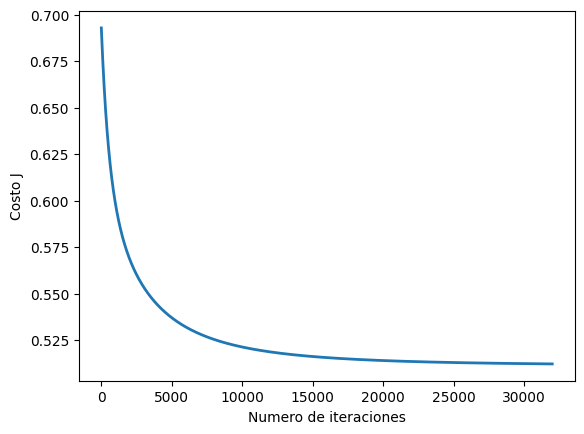

In [ ]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001
num_iters = 32000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(22)
theta, J_history = descensoGradiente(theta, X, y, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

In [ ]:
# verificar si ingresa o no a la universidad
# X_array = [1, 1, 80, 66, 28, 0, 33.4, 0.675, 46]
X_norm, mu, sigma = featureNormalize(X_test)
m, n = X_norm.shape
X_test_norm = np.concatenate([np.ones((m, 1)), X_norm], axis=1)
aprueba = sigmoid(np.dot(X_test_norm, theta))   # Se debe cambiar esto
predicciones_binarias = np.round(aprueba).astype(int)
print(predicciones_binarias)
# Imprime los primeros 10 resultados
print("Primeros 20 resultados:", predicciones_binarias[:20])

# Imprime los últimos 10 resultados
print("Últimos 20 resultados:", predicciones_binarias[-20:])
#print('Una persona con los siguientes datos [1, 1, 80, 66, 28, 0, 33.4, 0.675, 46] tiene como probabilida de ser diabetico:{:.0f}'.format(aprueba))

[1 0 1 ... 1 0 0]
Primeros 20 resultados: [1 0 1 0 0 1 0 1 0 1 1 1 0 0 0 1 0 0 1 0]
Últimos 20 resultados: [0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0]


COMPARACION CON DATOS DE PRUEBA

In [ ]:
# Imprime los primeros 10 resultados
print("Primeros 20 resultados:", y_test[:20])

# Imprime los últimos 10 resultados
print("Últimos 20 resultados:", y_test[-20:])

Primeros 20 resultados: [0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0.]
Últimos 20 resultados: [0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1.]


Prueba con valor de X donde se sabe que la Y deberia ser 0 pero no hay el resultado esperado

In [ ]:
X_array = [45,155,55,75.0,1.5,1.2,1,1,126,72,91,227,100,76,131,12.5,2,0.6,23,11,12,0]
predict = sigmoid(np.dot(X_array, theta))
print('Una persona con los siguientes datos [45,155,55,75.0,1.5,1.2,1,1,126,72,91,227,100,76,131,12.5,2,0.6,23,11,12,0] tiene como probabilida de ser fumador:{:.0f}'.format(predict))

Una persona con los siguientes datos [45,155,55,75.0,1.5,1.2,1,1,126,72,91,227,100,76,131,12.5,2,0.6,23,11,12,0] tiene como probabilida de ser fumador:1


MODELO DE REGRESION LOGISTICA (CLASIFICACION)

CON REGULARIZACION

AQUI ESTAN LOS PRIMEROS PASOS, IMPORTACION DE LIBRERIAS PARA REALIZAR LO QUE TENEMOS QUE HACER

In [ ]:
# se utiliza para el manejo de rutas y directorios.
import os

# Calculo cientifico y vectorial para python
import numpy as np

# Librerias para graficar
from matplotlib import pyplot

# Modulo de optimización de scipy
from scipy import optimize

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

AQUI ES DONDE CARGAMOS LOS DATOS DEL DATASET QUE TENEMOS, EN ESTE CASO ES UN DATASET QUE EN BASE A LAS X PODEMOS DETERMINAR SI UNA PERSONA ES FUMADORA O NO

In [ ]:
# Cargar datos
# Las dos primeras columnas contienen la nota de dos examenes y la tercera columna
# contiene la etiqueta que indica si el alumno ingreso o no a la universidad.
data = np.loadtxt('/content/drive/MyDrive/Dataset/train_dataset modificado.csv', delimiter=',')
# X, y = data[:, 0:8], data[:, 8]
X_train, y_train = data[:31187,:21], data[:31187, 22]
X_test, y_test = data[31187:,:21], data[31187:, 22]
X = X_train
y = y_train
print(X)

[[  35.  170.   85. ...   61.  115.  125.]
 [  20.  175.  110. ...   19.   25.   30.]
 [  45.  155.   65. ... 1090. 1400.  276.]
 ...
 [  25.  170.   65. ...   21.   14.   15.]
 [  50.  170.   70. ...   49.   54.  283.]
 [  40.  160.   45. ...   16.    9.   17.]]


FUNCION SIGMOIDEA

In [ ]:
def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    # convierte la intrada a un arreglo numpy
    z = np.array(z)

    g = np.zeros(z.shape)

    g = 1 / (1 + np.exp(-z))

    return g

NORMALIZADO

In [ ]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [ ]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

Se implementa la funcion cost y gradient, para la regresión logistica. Antes de continuar es importante agregar el termino de intercepcion a X.

In [ ]:
# Configurar la matriz adecuadamente, y agregar una columna de unos que corresponde al termino de intercepción.
m, n = X.shape
# Agraga el termino de intercepción a A
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)
# X = np.concatenate([np.ones((m, 1)), X], axis=1)

In [ ]:
def calcularCosto(theta, X, y, lambda_):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    h = sigmoid(X.dot(theta.T))
    temp = theta
    temp[0] = 0
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + (lambda_ / (2 * m)) * np.sum(np.square(temp))

    return J

In [ ]:
def descensoGradiente(theta, X, y, alpha, num_iters):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)

        J_history.append(calcularCosto(theta, X, y, lambda_))
    return theta, J_history

theta calculado por el descenso por el gradiente: [ 0.         -0.00159669  0.54661494 -0.0881968  -0.03583951  0.00593195
  0.00126075 -0.00853866  0.02101967 -0.10917488  0.02955707  0.097981
 -0.0989072   0.29386519 -0.04652597 -0.05767039  0.53774799 -0.02164566
  0.04247607 -0.02693092 -0.1452062   0.5367718 ]


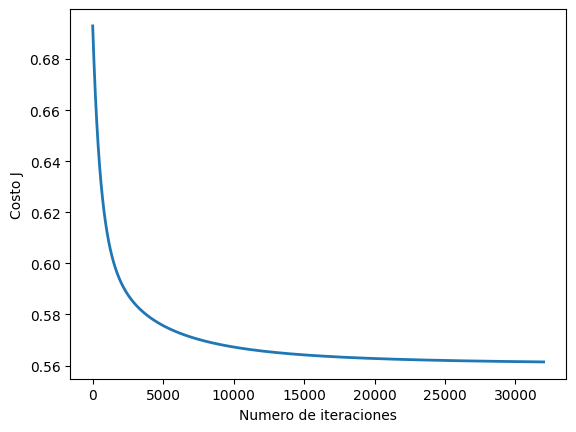

In [ ]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001
num_iters = 32000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(22)
theta, J_history = descensoGradiente(theta, X, y, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

In [ ]:
# verificar si ingresa o no a la universidad
# X_array = [1, 1, 80, 66, 28, 0, 33.4, 0.675, 46]
X_norm, mu, sigma = featureNormalize(X_test)
m, n = X_norm.shape
X_test_norm = np.concatenate([np.ones((m, 1)), X_norm], axis=1)
aprueba = sigmoid(np.dot(X_test_norm, theta))   # Se debe cambiar esto
predicciones_binarias = np.round(aprueba).astype(int)
print(predicciones_binarias)
# Imprime los primeros 10 resultados
print("Primeros 20 resultados:", predicciones_binarias[:20])

# Imprime los últimos 10 resultados
print("Últimos 20 resultados:", predicciones_binarias[-20:])
#print('Una persona con los siguientes datos [1, 1, 80, 66, 28, 0, 33.4, 0.675, 46] tiene como probabilida de ser diabetico:{:.0f}'.format(aprueba))

[1 1 1 ... 1 0 0]
Primeros 20 resultados: [1 1 1 0 1 1 0 1 0 1 1 1 0 0 0 1 0 0 1 0]
Últimos 20 resultados: [1 0 0 1 0 0 0 1 0 1 1 1 1 0 1 0 0 1 0 0]


COMPARACION CON DATOS DE PRUEBA

In [ ]:
# Imprime los primeros 10 resultados
print("Primeros 20 resultados:", y_test[:20])

# Imprime los últimos 10 resultados
print("Últimos 20 resultados:", y_test[-20:])

Primeros 20 resultados: [0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0.]
Últimos 20 resultados: [0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1.]


Prueba con valor de X donde se sabe que la Y deberia ser 0 pero no hay el resultado esperado

In [ ]:
X_array = [45,155,55,75.0,1.5,1.2,1,1,126,72,91,227,100,76,131,12.5,2,0.6,23,11,12,0]
predict = sigmoid(np.dot(X_array, theta))
print('Una persona con los siguientes datos [45,155,55,75.0,1.5,1.2,1,1,126,72,91,227,100,76,131,12.5,2,0.6,23,11,12,0] tiene como probabilida de ser fumador:{:.0f}'.format(predict))

Una persona con los siguientes datos [45,155,55,75.0,1.5,1.2,1,1,126,72,91,227,100,76,131,12.5,2,0.6,23,11,12,0] tiene como probabilida de ser fumador:1


No se observa ningun cambio en ambos ejercicios del modelo de regresion logistica de clasificacion, los resultados de la prediccion se mantienen igual con o sin regularizacion